PRM - Visibility PRM
======================

This code is part of the course "Introduction to robot path planning" (Author: Bjoern Hein).

Version | Author
------------ | -------------
0.2 | Björn Hein

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

Important links are:

    General Info: http://www.python.org
    Python tutorial http://www.python.org/doc/tut/
    NetworkX http://networkx.github.io/
    NumPy and SciPy Guide http://docs.scipy.org/
    Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html
    

Remember that:

    you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
    you can execute the whole notebook by Cell->runAll





Visibility Roadmap
==================

*Slightly modified* as described in the slides. See comments in code (IPVisibilityPRM.py). First tests could look like

In [1]:
from IPVisibilityPRM import VisPRM
from IPVISBasicPRM import basicPRMVisualize
import matplotlib.pylab as plt

In [2]:
import IPTestSuite as ts

ERROR:  Trap 'CollisionChecker' object has no attribute 'getDim'
ERROR:  Bottleneck 'CollisionChecker' object has no attribute 'getDim'
ERROR:  Fat bottleneck 'CollisionChecker' object has no attribute 'getDim'
ERROR:  MyField 'CollisionChecker' object has no attribute 'getDim'


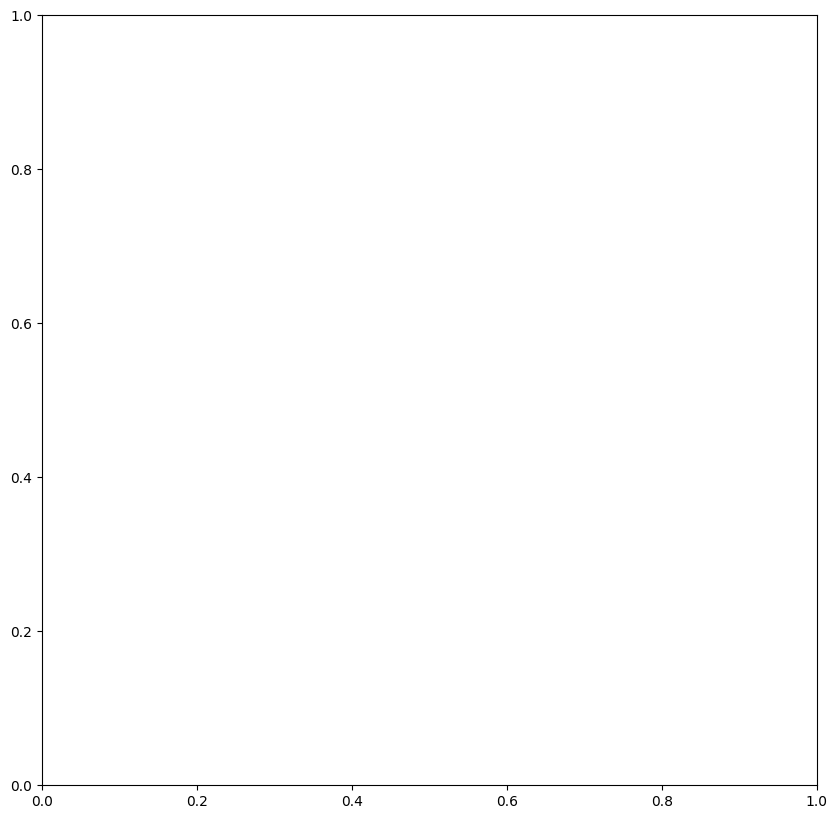

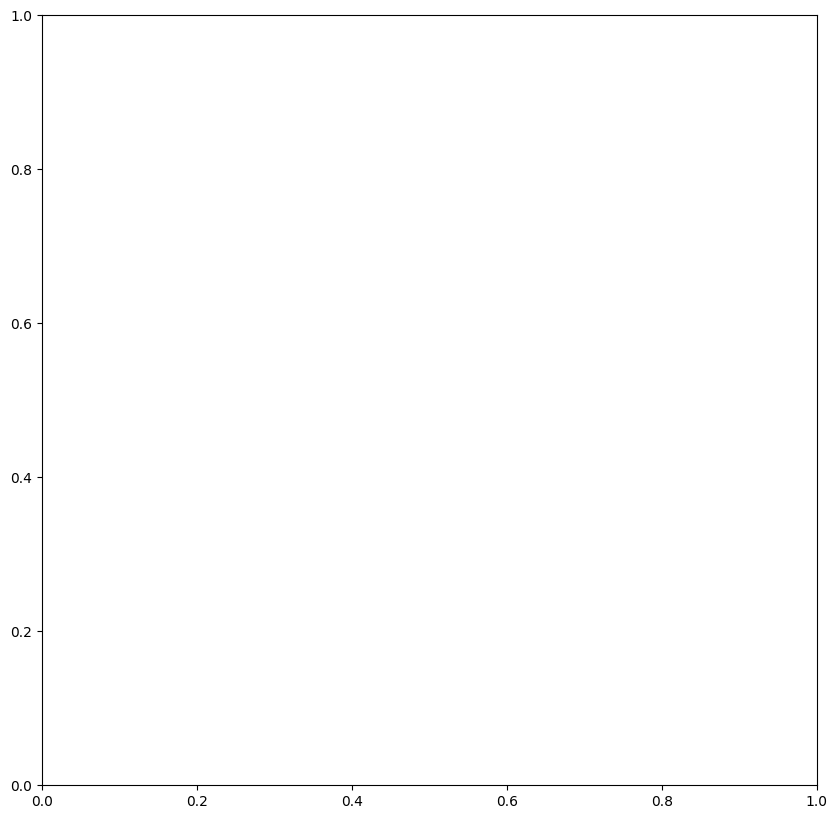

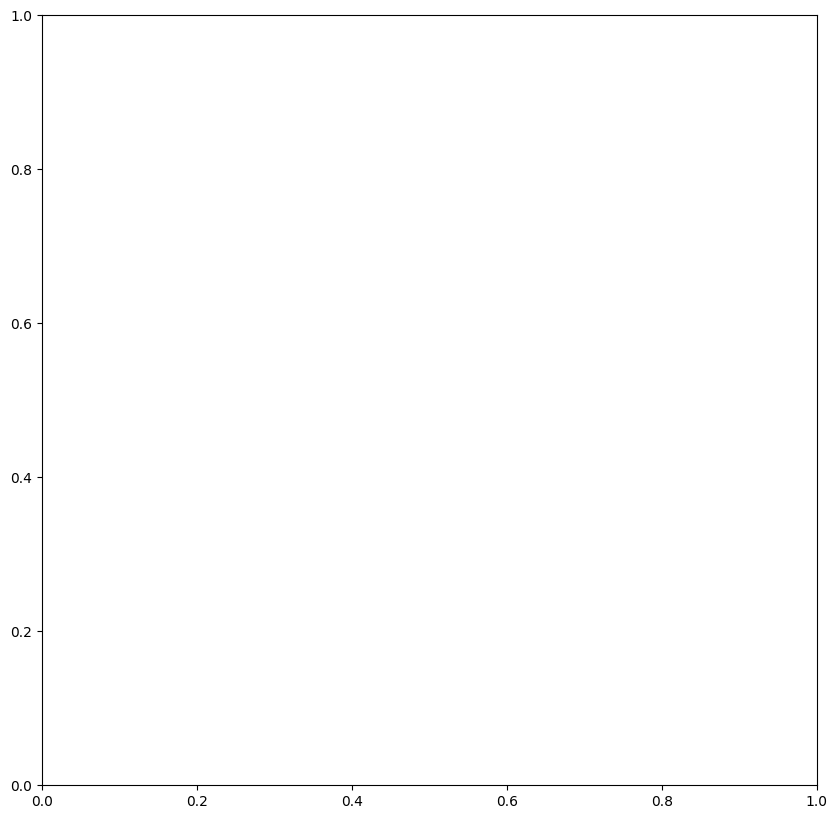

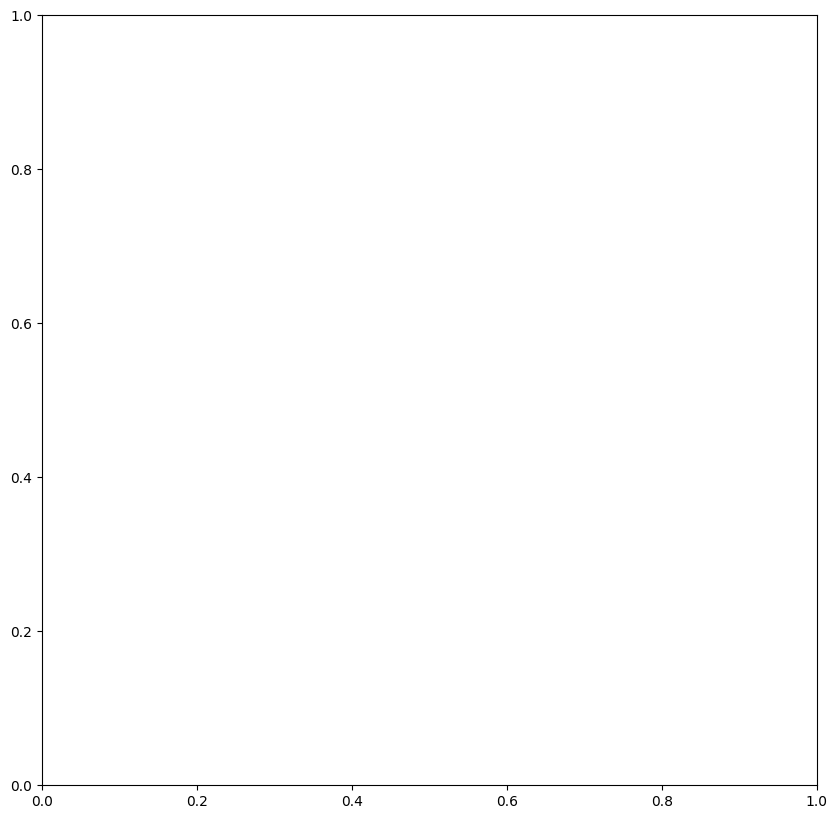

In [3]:
visConfig = dict()
visConfig["ntry"] = 40

for benchmark in ts.benchList:
    try:
        fig_local = plt.figure(figsize=(10,10))
        ax = fig_local.add_subplot(1,1,1)
        vis = VisPRM(benchmark.collisionChecker)
        solution = vis.planPath(benchmark.startList, benchmark.goalList, visConfig)
        title = benchmark.name
        if solution == []:
            title += " (No path found!)"
        title += "\n Assumed complexity level " + str(benchmark.level)
        ax.set_title(title)
        basicPRMVisualize(vis, solution, ax=ax, nodeSize=50)
    except Exception as e:
        print("ERROR: ",benchmark.name, e)

---

It is ovbious that the roadmaps are significantly smaller then the approach proposed in BasicPRM. But it is not obvious, whats happening in the algorithm. Therefore there is the idea to collect more data via a StatsHandler, it could look like this:

```python
class VisibilityStatsHandler():
    
    def __init__(self):
        self.graph = nx.Graph()
        
    def addNodeAtPos(self,nodeNumber,pos):
        self.graph.add_node(nodeNumber, pos=pos, color='yellow')
        return
    
    def addVisTest(self,fr,to):
        self.graph.add_edge(fr, to)
        return
```

Basically the idea is to, collect information about all nodes and edges checked during the planning process as they are removed or - better - not added, if they are redundant.

Therefore also the visualisation must be adapted, e.g. like:

```python
def visibilityPRMVisualize(planner, solution, ax = None, nodeSize = 300):
    # get a list of positions of all nodes by returning the content of the attribute 'pos'
    graph = planner.graph
    statsHandler = planner.statsHandler
    collChecker = planner._collisionChecker
    pos = nx.get_node_attributes(graph,'pos')
    color = nx.get_node_attributes(graph,'color')
    
    if statsHandler:
        statPos = nx.get_node_attributes(statsHandler.graph,'pos')
        nx.draw(statsHandler.graph, pos=statPos, alpha=0.2,edge_color='y',node_size=nodeSize)
        
    # draw graph (nodes colorized by degree)
    nx.draw(graph, pos = pos, nodelist=color.keys(), node_color = color.values(), ax=ax)   
    nx.draw_networkx_edges(graph,pos,
                               edge_color='b',
                               width=3.0, ax=ax
                            )
   
    collChecker.drawObstacles(ax)
    # get nodes based on solution path
    Gsp = nx.subgraph(graph,solution)

    # draw edges based on solution path
    nx.draw_networkx_edges(Gsp,pos,alpha=0.8,edge_color='g',width=10, label="Solution Path",ax=ax)
        
    # draw start and goal
    # draw start and goal
    if "start" in graph.nodes(): 
        nx.draw_networkx_nodes(graph,pos,nodelist=["start"],
                                   node_size=nodeSize,
                                   node_color='#00dd00',  ax = ax)
        nx.draw_networkx_labels(graph,pos,labels={"start": "S"},  ax = ax)


    if "goal" in graph.nodes():
        nx.draw_networkx_nodes(graph,pos,nodelist=["goal"],
                                   node_size=nodeSize,
                                   node_color='#DD0000',  ax = ax)
        nx.draw_networkx_labels(graph,pos,labels={"goal": "G"},  ax = ax)

```

This would then be incorporated in the corresponding module IPVisibilityPRM.

With this the following would be possible

In [4]:
from IPVisibilityPRM import VisPRM
from IPVisibilityPRM import VisibilityStatsHandler
from IPVISVisibilityPRM import visibilityPRMVisualize
import matplotlib.pylab as plt

In [5]:
import IPTestSuite as ts

ERROR:  Trap 'CollisionChecker' object has no attribute 'getDim'
ERROR:  Bottleneck 'CollisionChecker' object has no attribute 'getDim'
ERROR:  Fat bottleneck 'CollisionChecker' object has no attribute 'getDim'
ERROR:  MyField 'CollisionChecker' object has no attribute 'getDim'


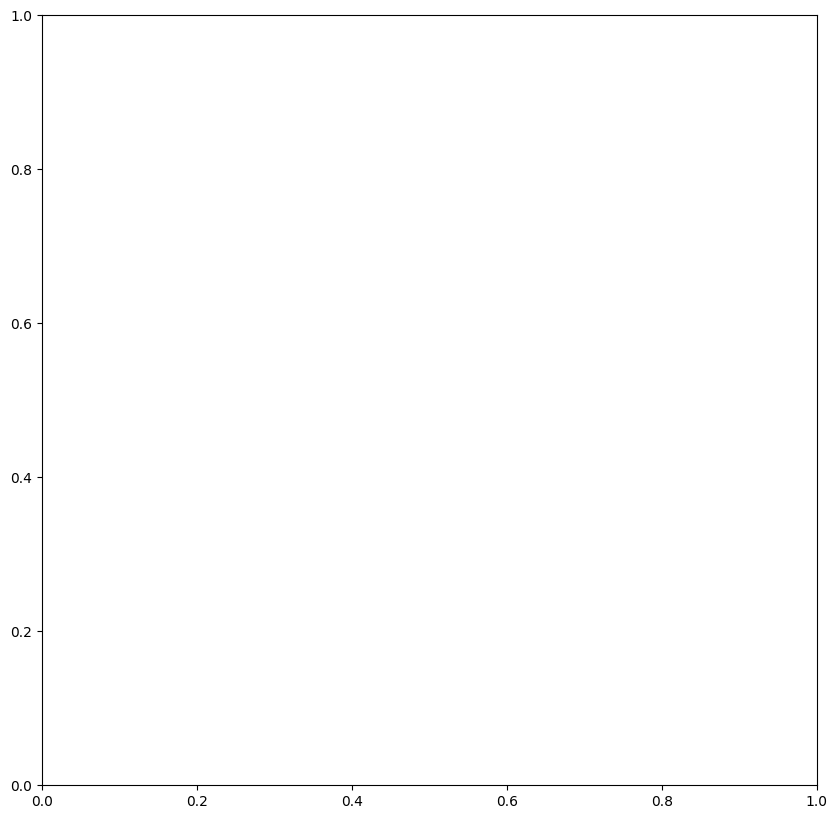

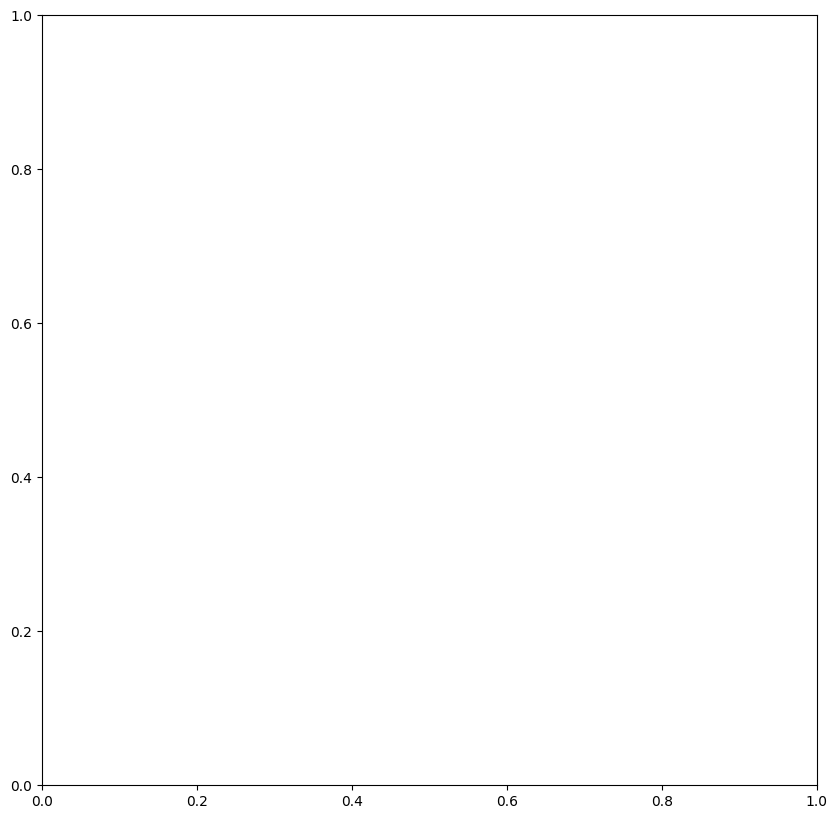

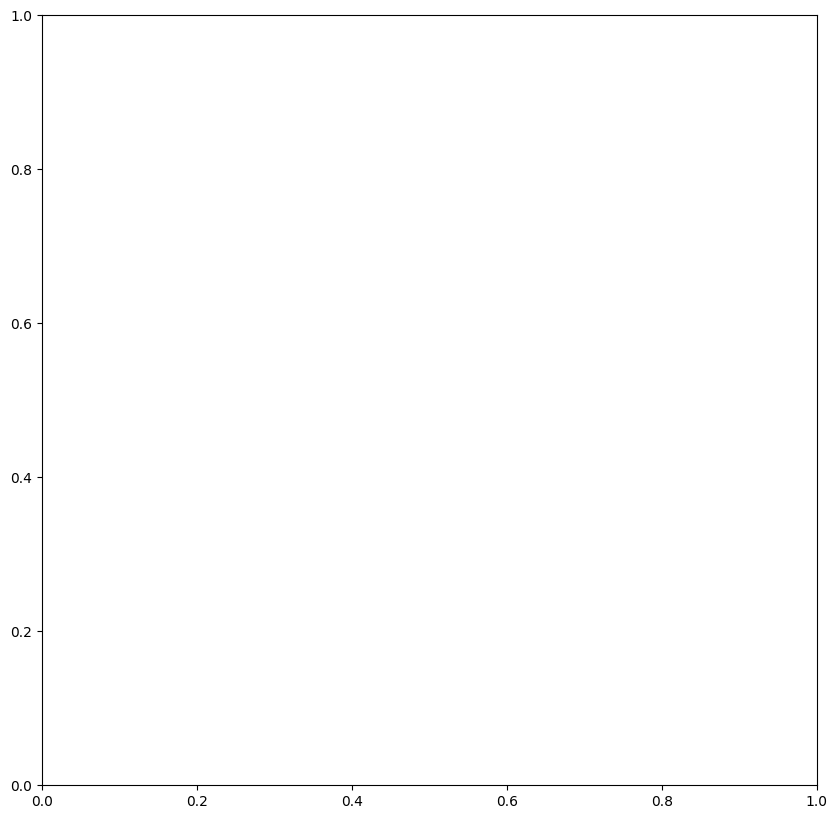

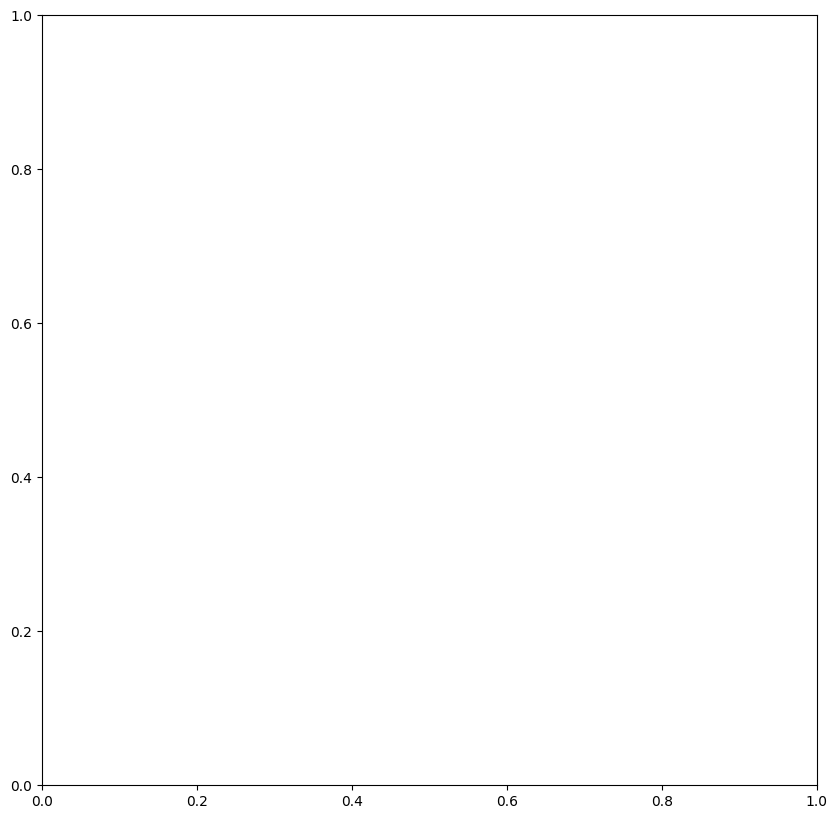

In [6]:
visConfig = dict()
visConfig["ntry"] = 40

for benchmark in ts.benchList:
    try:
        fig_local = plt.figure(figsize=(10,10))
        ax = fig_local.add_subplot(1,1,1)
        statsHandler = VisibilityStatsHandler()
        vis = VisPRM(benchmark.collisionChecker, statsHandler)        
        solution = vis.planPath(benchmark.startList, benchmark.goalList, visConfig)
        title = benchmark.name
        if solution == []:
            title += " (No path found!)"
        title += "\n Assumed complexity level " + str(benchmark.level)
        ax.set_title(title)
        visibilityPRMVisualize(vis, solution, ax=ax, nodeSize=50)
    except Exception as e:
        print("ERROR: ",benchmark.name, e)

# Comparison with the Basic PRM

In [7]:
import IPTestSuite as ts

In [8]:
from IPBasicPRM import BasicPRM
from IPVISBasicPRM import basicPRMVisualize
from IPVisibilityPRM import VisPRM,VisibilityStatsHandler
from IPVISVisibilityPRM import visibilityPRMVisualize

'CollisionChecker' object has no attribute 'getDim'
'CollisionChecker' object has no attribute 'getDim'
'CollisionChecker' object has no attribute 'getDim'
'CollisionChecker' object has no attribute 'getDim'


<Figure size 1000x1000 with 0 Axes>

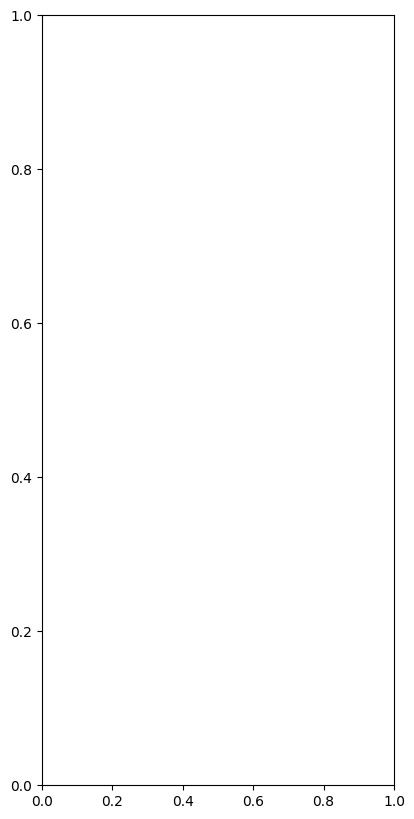

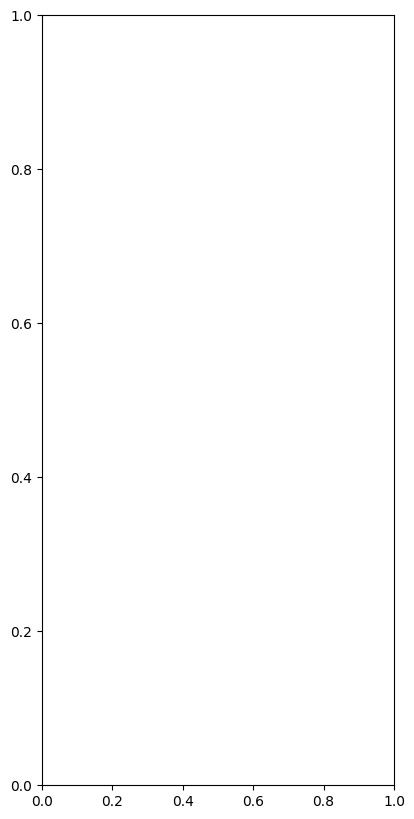

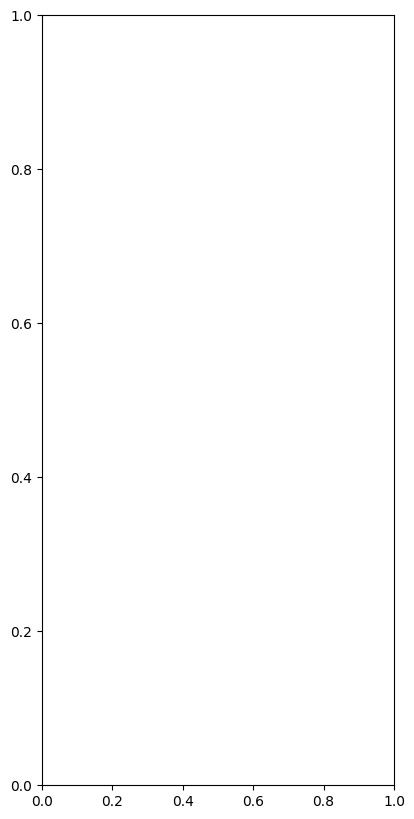

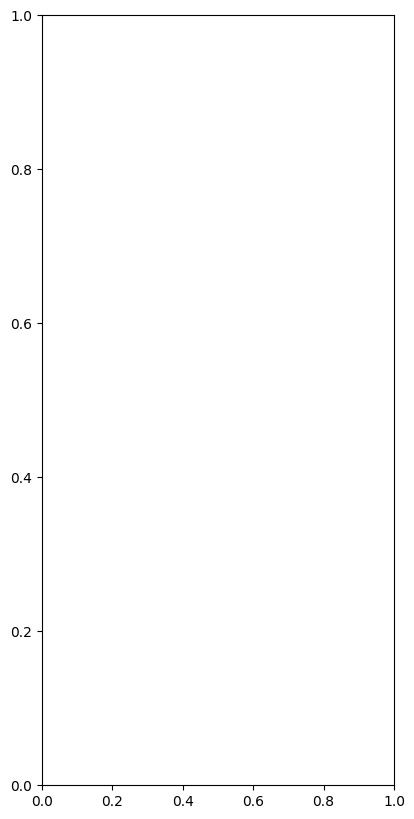

In [9]:
benchList = ts.benchList


basicConfig = dict()
basicConfig["radius"] = 3
basicConfig["numNodes"] = 300

visConfig = dict()
visConfig["ntry"] = 25

fig_local = plt.figure(figsize=(10,10))

place = 1
for bench in benchList:
    try:
        fig_local = plt.figure(figsize=(10,10))
        ax = fig_local.add_subplot(1,2,1)
        place += 1
        basicPRM = BasicPRM(bench.collisionChecker)
        solution = basicPRM.planPath(bench.startList, bench.goalList, basicConfig)
        title = bench.name
        if solution == []:
            title += " (No path found!)"
        title += "\n Assumed complexity level " + str(bench.level)
        ax.set_title(title)
        basicPRMVisualize(basicPRM,solution,ax=ax, nodeSize=50)
        
        
        ax = fig_local.add_subplot(1,2,2)
        statsHandler = VisibilityStatsHandler()
        vis = VisPRM(bench.collisionChecker, statsHandler)
        solution = vis.planPath(bench.startList, bench.goalList, visConfig)
        title = bench.name
        if solution == []:
            title += " (No path found!)"
        title += "\n Assumed complexity level " + str(bench.level)
        ax.set_title(title)
        visibilityPRMVisualize(vis, solution, ax=ax, nodeSize=50)
        
        
    except Exception as e:
        print (e)
        pass